In [78]:
import os
import pandas as pd
import numpy as np
import re
from json import load
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=2)

plot_infos = {
    'sudoku':{
        'marker':'o',
        'color':'red'
    },
    'cluster':{
        'marker':'s',
        'color':'red'
    },
    'menage':{
        'marker':'+',
        'color':'blue'
    },
    'cars':{
        'marker':'x',
        'color':'lime'
    },
    'queens':{
        'marker':'*',
        'color':'green'
    },
    'langford':{
        'marker':'o',
        'color':'orange'
    },
    'ex':{
        'marker':'s',
        'color':'black'
    },
    'graceful':{
        'marker':'+',
        'color':'purple'
    }
}

# markers list : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
# color list : https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [79]:
results_dir = 'results'
names = os.listdir(results_dir)
results = []
for name in names:
    filename = results_dir + '/' + name
    with open(filename) as f:
        entries = load(f)['results']
        for e in entries:
            for p in e['parameters']:
                e['p_'+p] = e['parameters'][p]
            del e['parameters']
        results.extend(entries)

df = pd.DataFrame(results)
df['category'] = df['p_file'].apply(lambda x: re.split(r'[_\-.0-9]',x)[0])
knuth = df[df.p_ex=='dlx2']
solnon = df[df.p_ex=='xcc-with-sparse-sets']
print(knuth)
print(solnon)



,command,mean,stddev,median,user,system,min,max,times,p_ex,p_file,p_path,category,color,marker
0,cat dlx2_sudoku4x4_1.txt | timeout 10m ../bin/...,0.005993,0.000319,0.005927,0.002406,0.003015,0.005286,0.007499,"[0.005633643105000001, 0.007499298105, 0.00570...",dlx2,sudoku4x4_1.txt,../instances/sudoku4x4_1.txt,sudoku,0,o
2,cat dlx2_cluster3.txt | timeout 10m ../bin/dlx2,0.067365,0.000318,0.067373,0.063321,0.003199,0.066855,0.068231,"[0.06699508949500001, 0.06739216849500002, 0.0...",dlx2,cluster3.txt,../instances/cluster3.txt,cluster,1,s
4,cat dlx2_menage12.txt | timeout 10m ../bin/dlx2,5.600897,0.053712,5.583738,5.592944,0.004874,5.567747,5.749700,"[5.571533022650001, 5.58098042065, 5.749699998...",dlx2,menage12.txt,../instances/menage12.txt,menage,2,+
6,cat dlx2_cars-7-5-5-8.txt | timeout 10m ../bin...,600.015002,0.002497,600.016415,599.538094,0.264769,600.010796,600.017518,"[600.01661440382, 600.01751828482, 600.0162159...",dlx2,cars-7-5-5-8.txt,./samples/cars-7-5-5-8.txt,cars,3,x
8,cat dlx2_menage13.txt | timeout 10m ../bin/dlx2,72.403524,0.148450,72.384594,72.348248,0.024811,72.185781,72.631129,"[72.233919337215, 72.391405541215, 72.37778234...",dlx2,menage13.txt,../instances/menage13.txt,menage,2,+
10,cat dlx2_sudoku_a.txt | timeout 10m ../bin/dlx2,0.006315,0.000307,0.006257,0.002698,0.003051,0.005648,0.007391,"[0.0072583841, 0.005973277100000001, 0.0062593...",dlx2,sudoku_a.txt,../instances/sudoku_a.txt,sudoku,0,o
12,cat dlx2_cluster2.txt | timeout -s INT 10m ../...,0.013590,0.003897,0.013027,0.009337,0.003369,0.011838,0.050472,"[0.01416439307, 0.01282158407, 0.01252865207, ...",dlx2,cluster2.txt,./samples/cluster2.txt,cluster,1,s
14,cat dlx2_queens15.txt | timeout 10m ../bin/dlx...,10.007629,0.080014,10.011397,9.962220,0.020365,9.904138,10.155288,"[9.904137673949998, 9.98090041795, 10.04252124...",dlx2,queens15.txt,./samples/queens15.txt,queens,4,*
16,cat dlx2_langford15.txt | timeout 10m ../bin/dlx2,216.675253,0.600826,216.407841,216.511286,0.069563,216.218066,218.162512,"[216.764542869405, 216.571541159405, 216.37383...",dlx2,langford15.txt,../instances/langford15.txt,langford,5,o
18,cat dlx2_menage14.txt | timeout 10m ../bin/dlx...,600.012391,0.002654,600.013765,599.778438,0.111639,600.006755,600.014403,"[600.0143788763299, 600.01423266233, 600.01440...",dlx2,menage14.txt,./samples/menage14.txt,menage,2,+


,command,mean,stddev,median,user,system,min,max,times,p_ex,p_file,p_path,category,color,marker
1,cat xcc-with-sparse-sets_sudoku4x4_1.txt | tim...,0.005889,0.000283,0.005830,0.002424,0.002955,0.005326,0.007663,"[0.005587807105, 0.007663422105, 0.00573561010...",xcc-with-sparse-sets,sudoku4x4_1.txt,../instances/sudoku4x4_1.txt,sudoku,0,o
3,cat xcc-with-sparse-sets_cluster3.txt | timeou...,0.058183,0.000976,0.058465,0.054352,0.003090,0.055839,0.059670,"[0.059669789495, 0.057493411495, 0.05645283349...",xcc-with-sparse-sets,cluster3.txt,../instances/cluster3.txt,cluster,1,s
5,cat xcc-with-sparse-sets_menage12.txt | timeou...,8.979052,0.071861,8.964958,8.968486,0.005758,8.897501,9.142234,"[8.968792870649999, 9.030133751649998, 8.89750...",xcc-with-sparse-sets,menage12.txt,../instances/menage12.txt,menage,2,+
7,cat xcc-with-sparse-sets_cars-7-5-5-8.txt | ti...,600.026839,0.002275,600.025928,599.620128,0.307074,600.025211,600.032520,"[600.02565238482, 600.02549336082, 600.0254361...",xcc-with-sparse-sets,cars-7-5-5-8.txt,./samples/cars-7-5-5-8.txt,cars,3,x
9,cat xcc-with-sparse-sets_menage13.txt | timeou...,116.564545,0.634427,116.439343,116.474752,0.037504,115.879776,118.037350,"[116.77648097021499, 116.425550244215, 118.037...",xcc-with-sparse-sets,menage13.txt,../instances/menage13.txt,menage,2,+
11,cat xcc-with-sparse-sets_sudoku_a.txt | timeou...,0.006069,0.000318,0.005979,0.002584,0.002967,0.005463,0.007396,"[0.0073956801, 0.0057134081, 0.005925627100000...",xcc-with-sparse-sets,sudoku_a.txt,../instances/sudoku_a.txt,sudoku,0,o
13,cat xcc-with-sparse-sets_cluster2.txt | timeou...,0.012094,0.000599,0.011955,0.008582,0.003082,0.011128,0.015513,"[0.011662236069999998, 0.012197192069999998, 0...",xcc-with-sparse-sets,cluster2.txt,./samples/cluster2.txt,cluster,1,s
15,cat xcc-with-sparse-sets_queens15.txt | timeou...,10.537340,0.043946,10.534443,10.506469,0.014996,10.478132,10.617242,"[10.47813196295, 10.484506832949998, 10.569618...",xcc-with-sparse-sets,queens15.txt,./samples/queens15.txt,queens,4,*
17,cat xcc-with-sparse-sets_langford15.txt | time...,195.747581,1.236339,196.051994,195.589822,0.064512,193.433714,196.898652,"[193.433714126405, 196.520311296405, 195.68369...",xcc-with-sparse-sets,langford15.txt,../instances/langford15.txt,langford,5,o
19,cat xcc-with-sparse-sets_menage14.txt | timeou...,600.011214,0.004380,600.010133,597.601772,0.637232,600.005552,600.017371,"[600.0173713343299, 600.0157300403299, 600.007...",xcc-with-sparse-sets,menage14.txt,./samples/menage14.txt,menage,2,+


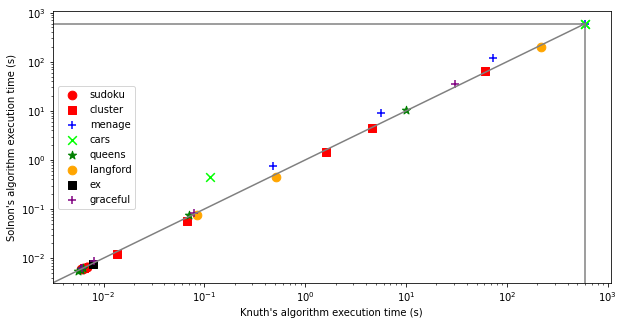

Each point above the diagonal means that Knuth's is better than Solnon's.
Each point under the diagonal means that Solnon's is better than Knuth's.
Each point on the diagonal means that both are equal.


In [104]:
plt.figure(figsize=(10,5))
plt.yscale('log')
plt.xscale('log')

#plt.scatter(knuth['mean'],solnon['mean'],c=solnon.color,cmap='tab10',marker='+')
for g in solnon.category.unique():
    s = solnon[solnon['category']==g]
    k = knuth[knuth['category']==g]
    try:
        plot_infos[g]
    except:
        print("No plot information for this category. Please fill the plot_infos dict at the beginning of the code.")
    plt.scatter(k['mean'], s['mean'], c = plot_infos[g]['color'],marker= plot_infos[g]['marker'],label = g,s=75.0)
plt.legend()
plt.xlabel("Knuth's algorithm execution time (s)")
plt.ylabel("Solnon's algorithm execution time (s)")
plt.plot([0,600],[0,600],color='grey') #diag line
plt.plot([0,600],[600,600],color='grey') #top line
plt.plot([0,0],[600,0],color='grey') #left line
plt.plot([0,600],[0,0],color='grey') #bottom line
plt.plot([600,600],[0,600],color='grey') #right line
plt.show()

print("Each point above the diagonal means that Knuth's is better than Solnon's.")
print("Each point under the diagonal means that Solnon's is better than Knuth's.")
print("Each point on the diagonal means that both are equal.")